In [31]:
pip install -r requirements.txt


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 1.4 MB/s eta 0:00:28
   ---------------------------------------- 0.1/38.1 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.1/38.1 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.1 MB 952.6 kB/s eta 0:00:40
   ---------------------------------------- 0.2/38.1 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.3/38.1 MB 874.6 kB/s eta 0:00:44
   ---------------------------------------- 0.3/38.1 MB 842.9 kB/s eta 0:00:45
   ---------------------------------------- 0.4/38.1 MB 928.4 kB/s eta 0:00:41
   ---------------------------------------- 0.4/38.1 MB 971.5 kB/s eta 0:00:39
 

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import cv

In [10]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [15]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [16]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [17]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [18]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [20]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [25]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 5, callbacks=callbacks_list)

Epoch 1/5
8/8 [==============================] - ETA: 0s - loss: 0.7278 - accuracy: 0.5234 
Epoch 1: val_accuracy improved from -inf to 0.47959, saving model to model_weights.h5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 120s 15s/step - loss: 0.7278 - accuracy: 0.5234 - val_loss: 0.6938 - val_accuracy: 0.4796
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.6571 - accuracy: 0.6308 
Epoch 2: val_accuracy improved from 0.47959 to 0.68367, saving model to model_weights.h5
8/8 [==============================] - 123s 16s/step - loss: 0.6571 - accuracy: 0.6308 - val_loss: 0.6413 - val_accuracy: 0.6837
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.6067 - accuracy: 0.6587 
Epoch 3: val_accuracy did not improve from 0.68367
8/8 [==============================] - 126s 16s/step - loss: 0.6067 - accuracy: 0.6587 - val_loss: 1.3197 - val_accuracy: 0.4694
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.5620 - accuracy: 0.6991 
Epoch 4: val_accuracy improved from 0.68367 to 0.71429, saving model to model_weights.h5
8/8 [==============================] - 121s 15s/step - loss: 0.5620 - accuracy: 0.6991 - val_loss: 0.5417 - 

In [27]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

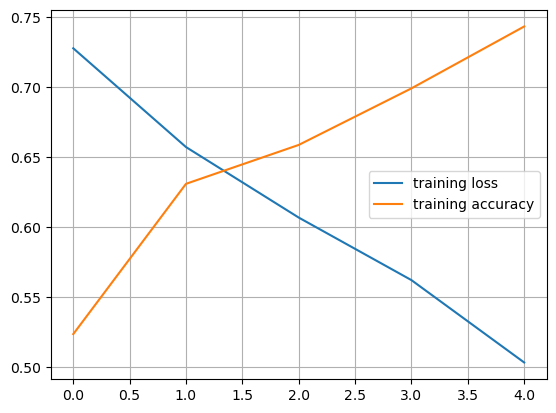

In [28]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [29]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 3s 478ms/step


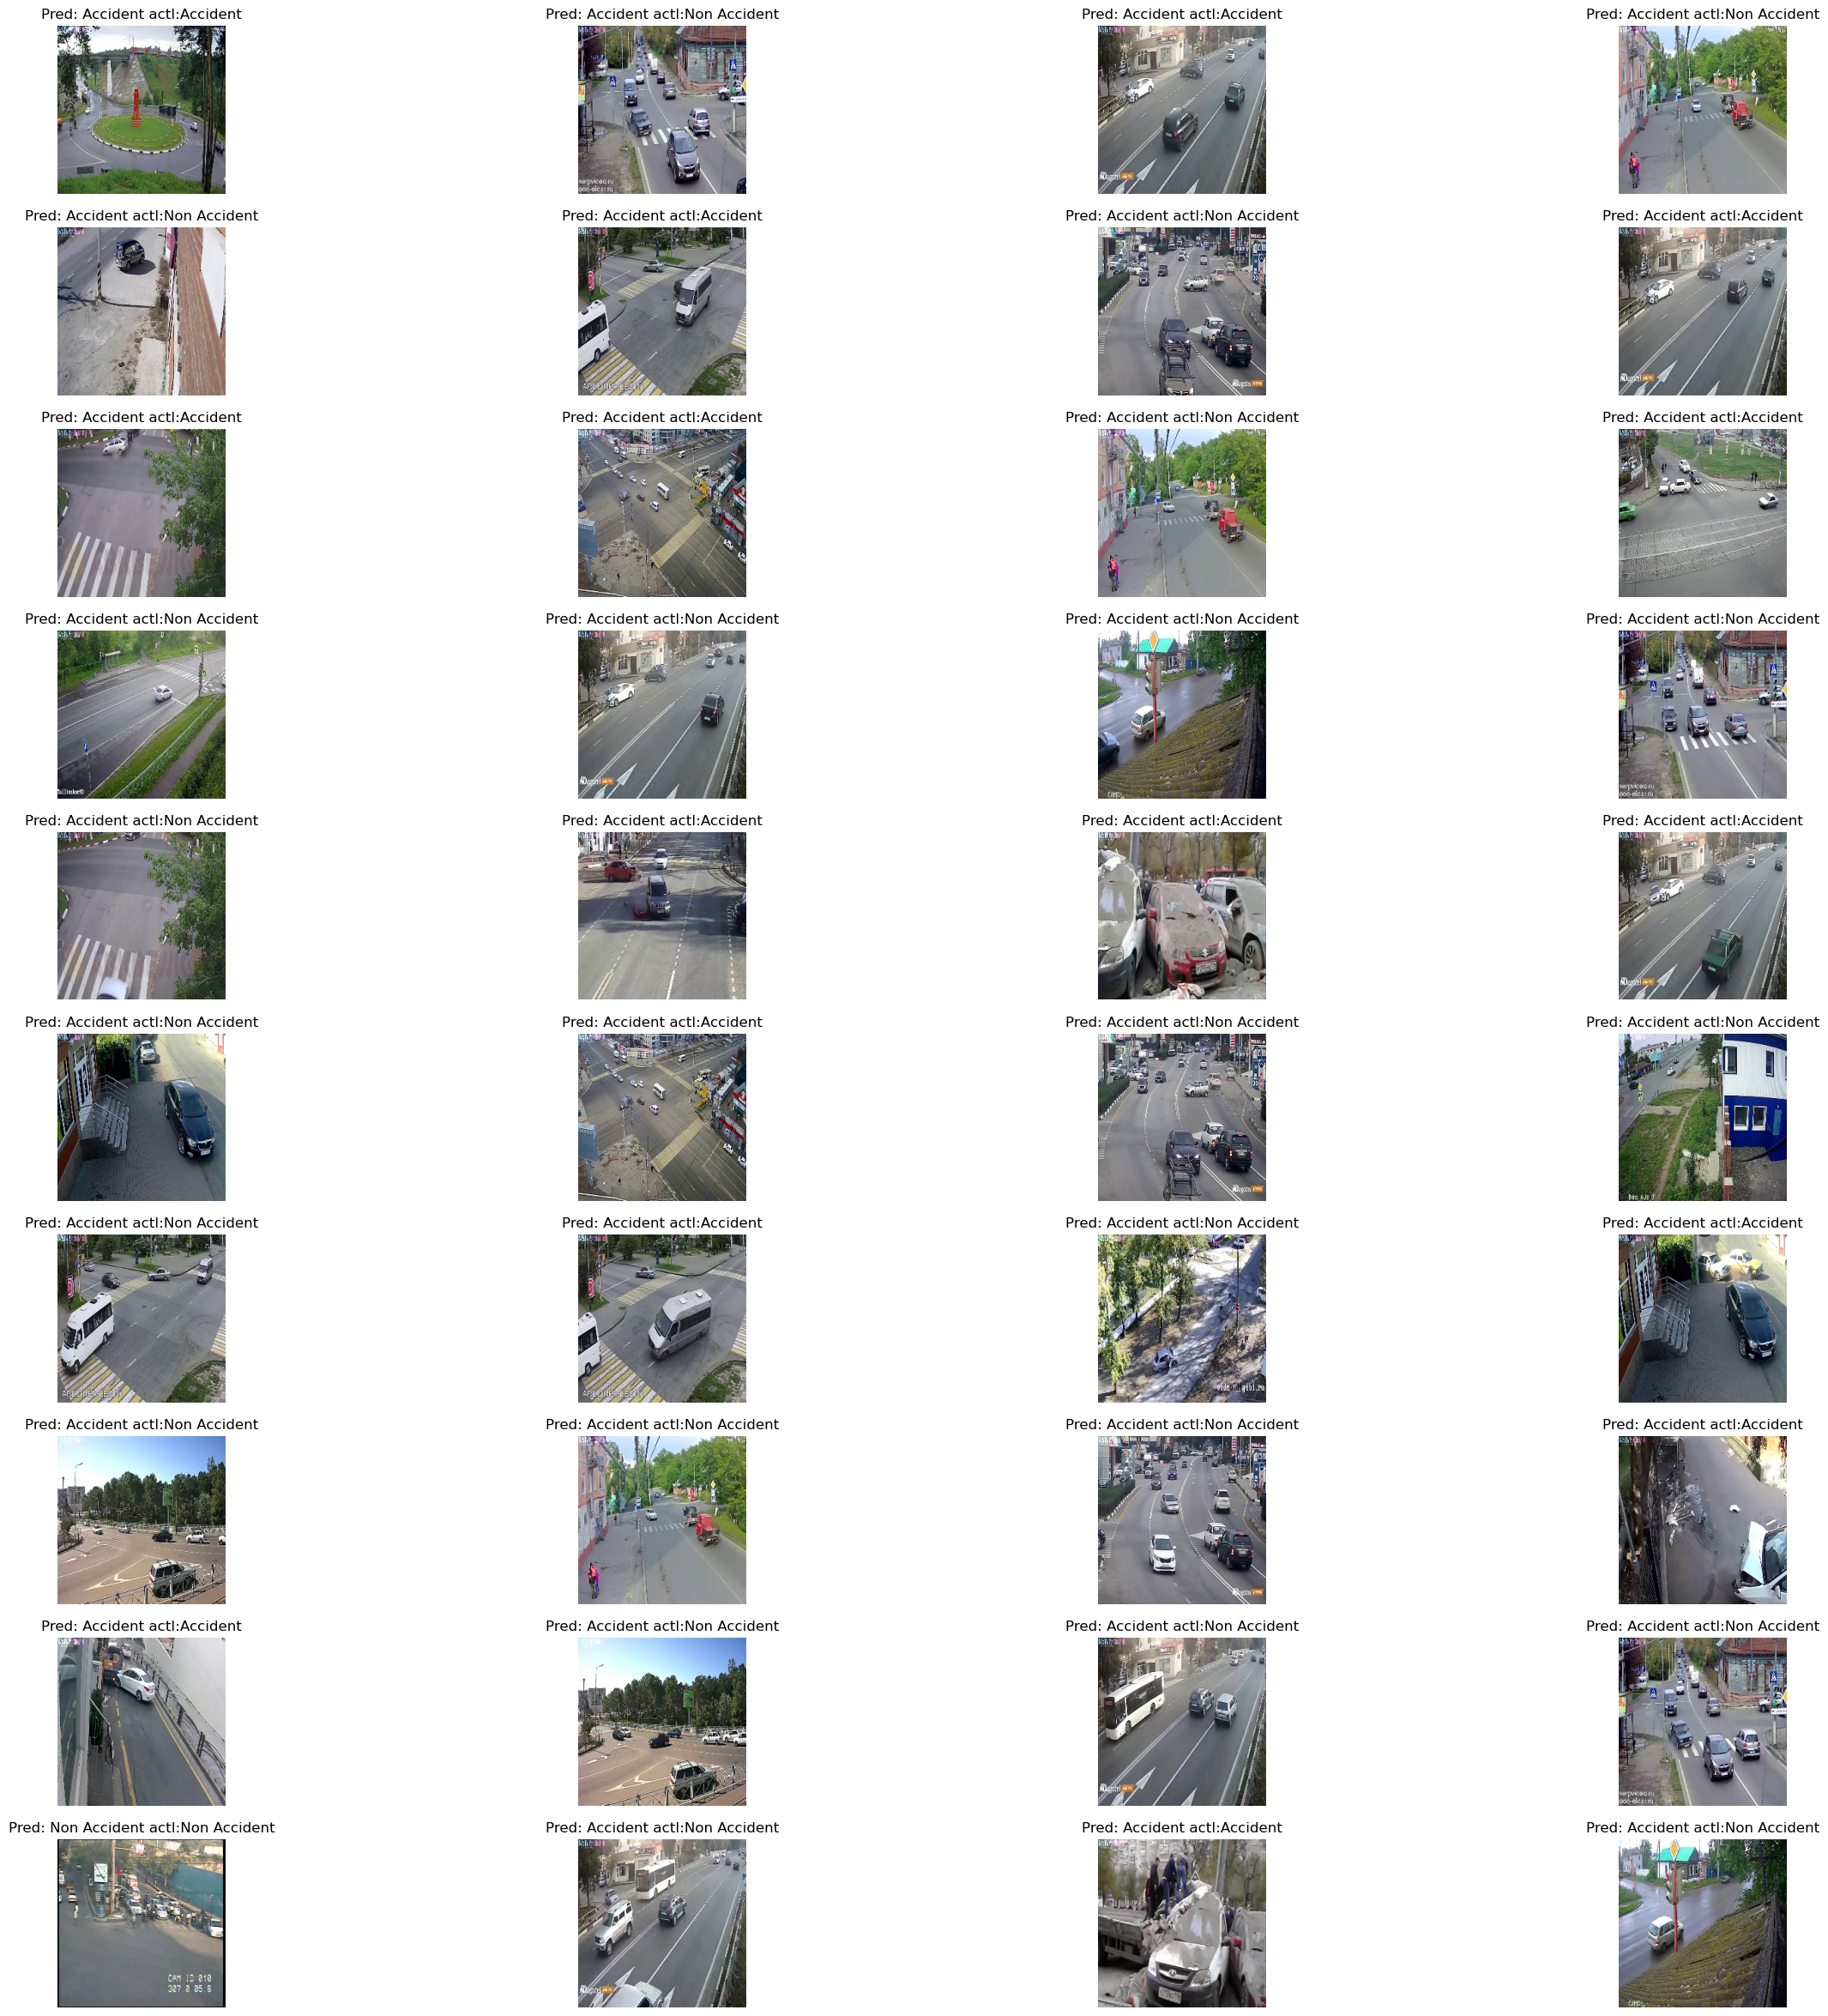

In [30]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [26]:
!python main.py

processing frame number 1

1/1 [==============================] - 1s 901ms/step
processing frame number 2

1/1 [==============================] - 0s 131ms/step
processing frame number 3

1/1 [==============================] - 0s 132ms/step
processing frame number 4

1/1 [==============================] - 0s 122ms/step
processing frame number 5

1/1 [==============================] - 0s 107ms/step
processing frame number 6

1/1 [==============================] - 0s 86ms/step
processing frame number 7

1/1 [==============================] - 0s 71ms/step
processing frame number 8

1/1 [==============================] - 0s 55ms/step
processing frame number 9

1/1 [==============================] - 0s 54ms/step
processing frame number 10

1/1 [==============================] - 0s 54ms/step
processing frame number 11

1/1 [==============================] - 0s 51ms/step
processing frame number 12

1/1 [==============================] - 0s 49ms/step
processing frame number 13

1/1 [===========

2023-10-03 15:00:42.885975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 15:00:43.418614: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-10-03 15:00:43.766048: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-10-03 15:00:43.827619: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
